In [1]:
#Import useful libraries and open the file
import pandas as pd #dataframe organization
import os
import numpy as np
import seaborn as sns #stats plotting toolbox
from scipy import stats
import matplotlib.pyplot as plt #plotting
import util #my library with some useful functions

#Read in a user's file
test_df = pd.read_csv("../input/goodreads_library_export_user2.csv", encoding = "ISO-8859-1")

print('Lookign at the first few rows: ')
test_df.head()



Lookign at the first few rows: 


,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,13581476,FLCL Omnibus,Gainax,"Gainax, Gainax",Hajime Ueda,1595828680,9.781596e+12,0,3.88,Dark Horse Comics,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,34128219,"La Belle Sauvage (The Book of Dust, #1)",Philip Pullman,"Pullman, Philip",NaN,0375815309,9.780376e+12,4,4.20,Alfred A. Knopf,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,4025275,War's Unwomanly Face,Svetlana Alexievich,"Alexievich, Svetlana",NaN,5010004941,9.785010e+12,5,4.52,Progress Publishers,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,36521370,Cherry,Nico Walker,"Walker, Nico",NaN,178733094X,9.781787e+12,0,4.02,Jonathan Cape,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,15177,Bridge of Birds (The Chronicles of Master Li a...,Barry Hughart,"Hughart, Barry",NaN,0345321383,9.780345e+12,0,4.29,Del Rey,...,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [2]:
#Understand how many data points and what is potentially contained within each point

print('Number of data total data points: ', test_df.shape[0])
print('Number of features for each data point: ', test_df.shape[1])
print('')
print('A list of all columns: ')
print(test_df.columns)

Number of data total data points:  570
Number of features for each data point:  31

A list of all columns: 
Index(['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors',
       'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding',
       'Number of Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions',
       'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes',
       'Read Count', 'Recommended For', 'Recommended By', 'Owned Copies',
       'Original Purchase Date', 'Original Purchase Location', 'Condition',
       'Condition Description', 'BCID'],
      dtype='object')


In [3]:
#Remove all entries w/ "0" in the "My Rating" field, these haven't been read/reviewed
test_df.drop(test_df.loc[test_df['My Rating'] == 0].index, inplace=True)

#Now, look at the new size of the dataset
print('Number of data total data points: ', test_df.shape[0])


Number of data total data points:  378


In [4]:
#Data looks pretty sparse. Show a histogram of the number of populated features

#Replace all '0' wth null, they are the same here
test_df.replace(to_replace=0, value=np.nan , inplace=True)
test_df.head()

percent_filled_cells = pd.DataFrame((test_df.notna().sum()/test_df.shape[0]*100), columns=['Data Present (%)'])

percent_filled_cells.style.bar(color=['#5fba7d'])

#Data cleaning - All entries whose fields contain 0% are eliminated
test_df.drop(columns=percent_filled_cells.loc[percent_filled_cells['Data Present (%)'] < 1].index, inplace=True)

percent_filled_cells_edited = pd.DataFrame((test_df.notna().sum()/test_df.shape[0]*100), columns=['Data Present (%)'])

percent_filled_cells.style.bar(color=['#5fba7d'])



,Data Present (%)
Book Id,100
Title,100
Author,100
Author l-f,100
Additional Authors,40.2116
ISBN,96.5608
ISBN13,96.8254
My Rating,100
Average Rating,100
Publisher,98.9418


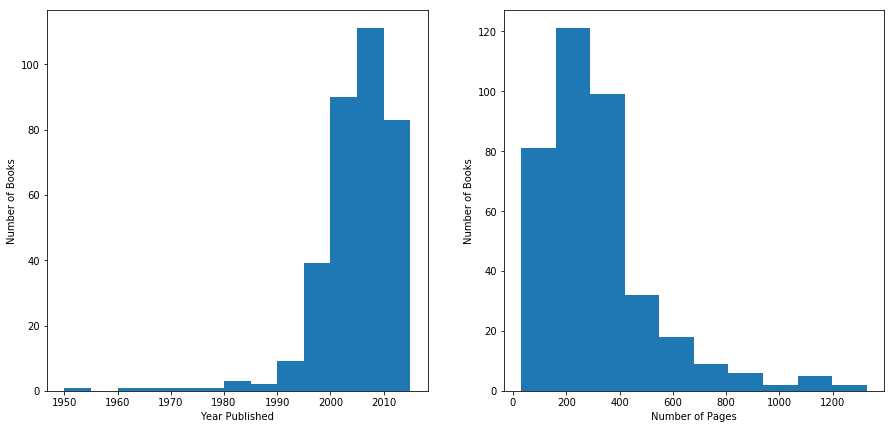

In [5]:
#Let's look at some at teh various statistucs about the books

#When are the books published

plt.figure(1, figsize=(15, 7))
plt.subplot(121)
plt.hist(test_df['Year Published'], bins=np.arange(test_df['Year Published'].min(), test_df['Year Published'].max(), 5))
plt.xlabel('Year Published')
plt.ylabel('Number of Books')

plt.subplot(122)
plt.hist(test_df.loc[test_df['Number of Pages'].notna()]['Number of Pages'])
plt.xlabel('Number of Pages')
plt.ylabel('Number of Books')


plt.show()


### Ratings Data

The following analysis investigates general trends regarding the books' ratings. Goodreads users rate books on a scale from 1-5 with increments of 1 (i.e., 1, 2, 3, 4, 5).

First, the mean ratings for all books read by this user is shown. The ratings distribution appear to be Guassian in nature with $\mu=4.10$ and $\sigma=0.25$. A Chi-squared test was performed to evaluate the goodness of fit of the Guassian curve on the global ratings distribution data. The test yielded the following values: $\chi^{2}=21.40$ and $p=0.9997$. In other words, the probability that our null hypothesis that this Guassian function is a good fit for our data is correct is 99.97%. In layman terms, it seems to be a very good fit.

In the same vein, we look at this particular users' ratings. Because the user is limited to only 5 different ratings (1,2,..5), the histogram takes on a more discretized appearance. A discussion with the user revealed that she tends to select books that she believes she will like, leading to the skew toward higher ratings. Again I tried to fit a Guassian curve on the user's data. The Guassian paramters were calculated as: $\mu=4.42$ and $\sigma=0.59$. A Chi-squared test was performed to evaluate the goodness of fit of the Guassian curve on the user's ratings distribution data. The test yielded the following values: $\chi^{2}=22.41$ and $p=0$. In other words, the probability that our null hypothesis that this Guassian function is a good fit for our data is correct is ~0%. In layman terms, the Guassian curve is a very bad fit for the user data. This is not surprising as there are too few bins (i.e. degrees of freedom in the Chi-squared test) to fit a Guassian curve to the data with any statistical significance.



Chi Squared Test for global ratings of books
Probability that the null hypothesis stating that global ratings are normally distributed: 0.999757
Gaussian fit parameters: mean=4.103, standard deviation=0.2548

Chi Squared Test for one user's ratings of books
Probability that the null hypothesis stating that global ratings are normally distributed: 5.34449e-05
Gaussian fit parameters: mean=4.423, standard deviation=0.5871


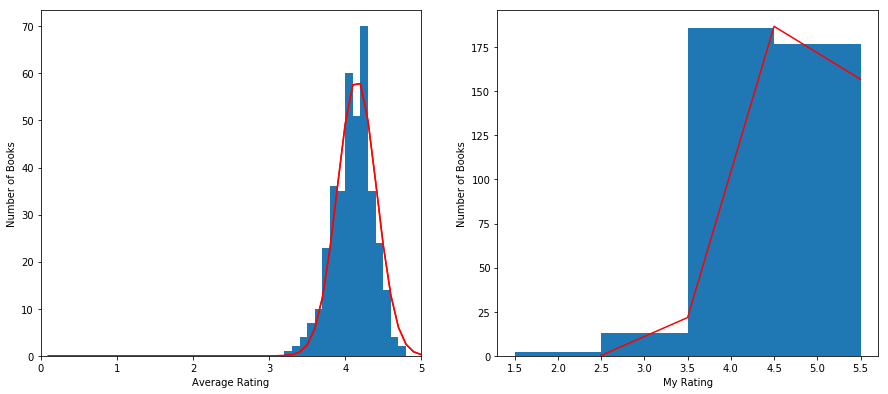

In [6]:
#Global and User ratings distributions

#Universal average ratings of the books
plt.figure(1, figsize=(15, 14))
plt.subplot(221)

num_points = test_df['Average Rating'].shape[0]
#Plot the histogram
hist_bins = np.arange(0, 5.1, 0.1)
actual_count, actual_bins, ignored = plt.hist(test_df['Average Rating'], bins = hist_bins)
#Find a guassian fit to the distribution curve
param = stats.norm.fit(test_df['Average Rating'])
gprob = np.diff(stats.norm.cdf(actual_bins, loc=param[0], scale=param[1]))
plt.plot(actual_bins[1:],gprob*num_points, 'r-')
plt.xlim(0,5)
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')

#Performing a chi-squared test to see if the guassian fit is good
gprob = np.diff(stats.norm.cdf(actual_bins, loc=param[0], scale=param[1]))
plt.plot(actual_bins[1:],gprob*num_points, 'r-')
nch, npval = stats.chisquare(actual_count, gprob*num_points)
print('Chi Squared Test for global ratings of books')
print('Probability that the null hypothesis stating that global ratings are normally distributed: {:.6}'.format(npval) )
print('Gaussian fit parameters: mean={:.4}, standard deviation={:.4}'.format(param[0], param[1]))
print('')

#My ratings of books
plt.subplot(222)
my_bins = np.arange(1.5, 6.5, 1)
actual_count_user, my_bins, ignored = plt.hist(test_df['My Rating'], bins=my_bins)
plt.xlabel('My Rating')
plt.ylabel('Number of Books')

#Find a guassian fit on the user's ratings
param_user = stats.norm.fit(test_df['My Rating'])
gprob_user = np.diff(stats.norm.cdf(my_bins, loc=param_user[0], scale=param_user[1]))
plt.plot(my_bins[1:],gprob_user*num_points, 'r-')
#Perform a chi squared test to detemine goodness of fit of guassian on user's ratings
nch_user, npval_user = stats.chisquare(actual_count_user, gprob_user*num_points)
print('Chi Squared Test for one user\'s ratings of books')
print('Probability that the null hypothesis stating that global ratings are normally distributed: {:.6}'.format(npval_user) )
print('Gaussian fit parameters: mean={:.4}, standard deviation={:.4}'.format(param_user[0], param_user[1]))


## Optimizing Book Selection

Ultimately the goal of this model is to optimize book selection. If we could build a model that accurately predicts a user's rating, then the model could be used to make book recommendations to our reader.

The first and most obvious way to recommend books to the reader is by choosing books with high global ratings. Consequently, the analysis presented here first explores the relationship between the global ratings of a book and the user's ratings.

### Relationship between Global Rating and User Rating

Intuition leads us to the following hypothesis: there is a positive relationship between a book's global ratings and a user's ratings.

We first look at the joint distribution between these two variables. In general, the joint distribution seems to confirm our hypothesis. The books with User Rating of '5' were more likely to have a higher global rating when compared to books with a User Rating of '4'.

To make this observation a little clearer, I show the conditional probability distribution functions. 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


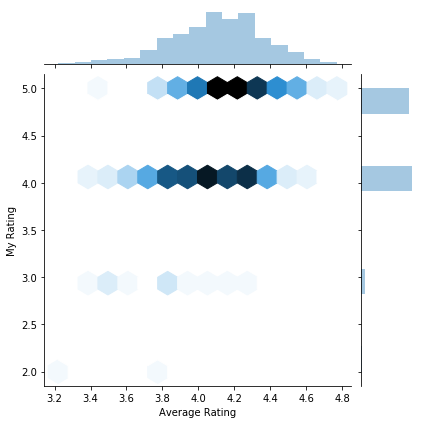

In [7]:
#Create a series with the differece between the ratings
diff_ratings = test_df['Average Rating']-test_df['My Rating']

# diff_hist_bins = np.arange(-3, 3, 0.1)
# plt.hist(diff_ratings, bins=diff_hist_bins)
# plt.xlabel('Average Rating - My Rating')
# plt.ylabel('Number of Books')

# plt.show()

#Show the joint distribution of average rating and user rating
sns.jointplot(x='Average Rating', y='My Rating', data=test_df, kind="hex")
plt.show()


Chi Squared Test for one user's ratings of books
Probability that the null hypothesis stating that global ratings are normally distributed: 0.999977
Gaussian fit parameters: mean=4.205, standard deviation=0.2158

Chi Squared Test for one user's ratings of books
Probability that the null hypothesis stating that global ratings are normally distributed: 0.999949
Gaussian fit parameters: mean=4.035, standard deviation=0.2372


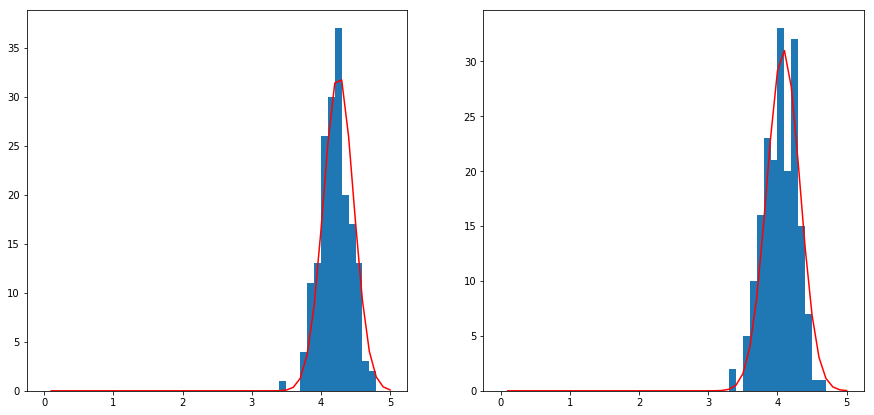

In [8]:
#Show the condition probablilities of global ratings given the user ratings

#Show the histogram of global ratings for user rating = 5
plt.figure(1, figsize=(15, 7))
plt.subplot(121)
#Define the hist bins
hist_bins = np.arange(0, 5.1, 0.1)
#Define a series of average ratings where user rated as '5'
cond_ratings_5 = test_df.loc[test_df['My Rating'] == 5]['Average Rating']
#Fit a guassian curve and plot histogram and fitted curve
actual_count, actual_bins, param_mean, param_std, nch_5, npval_5 = util.guass_fit_dist(cond_ratings_5, hist_bins = hist_bins)
#Print guassian params and goodness of fit test results
print('Chi Squared Test for one user\'s ratings of books')
print('Probability that the null hypothesis stating that global ratings are normally distributed: {:.6}'.format(npval_5) )
print('Gaussian fit parameters: mean={:.4}, standard deviation={:.4}'.format(param_mean, param_std))
print('')

#Show the histogram of global ratings for user rating = 4
plt.subplot(122)
#Define a series of average ratings where user rated as '4'
cond_ratings_4 = test_df.loc[test_df['My Rating'] == 4]['Average Rating']
#Fit a guassian curve
actual_count, actual_bins, param_mean_4, param_std_4, nch_4, npval_4 = util.guass_fit_dist(cond_ratings_4, hist_bins = hist_bins)
#Print guassian params and goodness of fit test results
print('Chi Squared Test for one user\'s ratings of books')
print('Probability that the null hypothesis stating that global ratings are normally distributed: {:.6}'.format(npval_4) )
print('Gaussian fit parameters: mean={:.4}, standard deviation={:.4}'.format(param_mean_4, param_std_4))